## Pandas Sales Analysis.

### Import required libraries.

In [25]:
import pandas as pd
import os

### Merge 12 months of data into a single file.

In [26]:
all_months_data = pd.DataFrame()

files = [file for file in os.listdir('SalesAnalysis/Sales_Data')]

for file in files:
    df = pd.read_csv('SalesAnalysis/Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
                     
all_months_data.to_csv('all_data.csv', index=False)

### Read in updated dataframe

In [27]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### There are NANs in our data so we should address them.

### Drop NANs

In [28]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [30]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Add month column

In [52]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,City,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,Dallas,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,Boston,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,Los Angeles,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,Los Angeles,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,Los Angeles,"333 8th St, Los Angeles, CA 90001",4


## What is the best month for sales?

### Convert data type, create column and rearrange columns

In [53]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float')

In [54]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,City,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,Dallas,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,Boston,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,Los Angeles,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,Los Angeles,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,Los Angeles,"333 8th St, Los Angeles, CA 90001",4


In [55]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [56]:
all_data = all_data[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Order Date', 'Purchase Address', 'Month']]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Question 1: Best month for sales, how much was earned?

In [57]:
result = all_data.groupby('Month').sum('numeric')

In [58]:
import matplotlib.pyplot as plt
import datetime

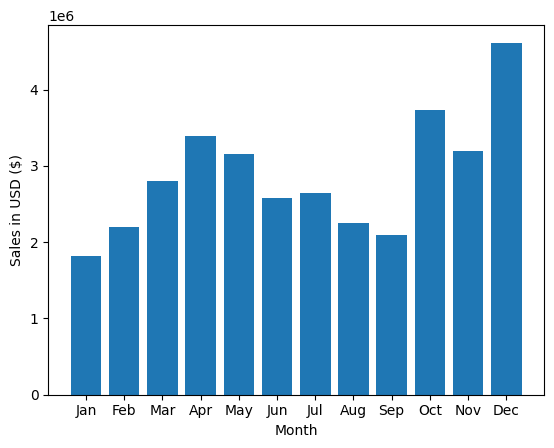

In [59]:
month_num = range(1, 13)
months = []

for i in month_num:
    i = str(i)
    datetime_object = datetime.datetime.strptime(i, "%m")
    month_name = datetime_object.strftime('%b')
    months.append(month_name)
    
plt.bar(months, result['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()

##### Now we know that December is the month with the most sales, but that is a fairly obvious statement given that December is when some parts of the world celebrate Christmas.

I am now going to add a city column so that we can take a look at the data on a city by city basis. 

In [60]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [61]:
temp_df = all_data['Purchase Address'].str.split(',', n=2, expand=True)

In [62]:
temp_df.head()

,0,1,2
0,917 1st St,Dallas,TX 75001
2,682 Chestnut St,Boston,MA 02215
3,669 Spruce St,Los Angeles,CA 90001
4,669 Spruce St,Los Angeles,CA 90001
5,333 8th St,Los Angeles,CA 90001


##### Creating a new city column and rearranging colulmn order. 

In [63]:
all_data['City'] = temp_df[1]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


In [64]:
all_data = all_data[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Order Date', 'Month', 'City', 'Purchase Address']]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,City,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,Dallas,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,Boston,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,Los Angeles,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,Los Angeles,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,Los Angeles,"333 8th St, Los Angeles, CA 90001"


##### American city names will not suffice since there are duplicate city names all over the place. Washington and Maine come to mind. I am sure there are others. I will make a city column inclusive of this added complexity.

In [65]:
def get_state(address):
    return address.split(',')[2].split(' ',)[1]

def get_city(address):
    return address.split(',')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,City,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,Dallas (TX),"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,Boston (MA),"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,Los Angeles (CA),"333 8th St, Los Angeles, CA 90001"


### Question 2: Which city had the highest number of sales

In [66]:
result = all_data.groupby('City').sum('Numeric')
result.head()

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta (GA),16602,2779908.20,2795498.58,104794
Austin (TX),11153,1809873.61,1819581.75,69829
Boston (MA),22528,3637409.77,3661642.01,141112
Dallas (TX),16730,2752627.82,2767975.40,104620
Los Angeles (CA),33289,5421435.23,5452570.80,208325


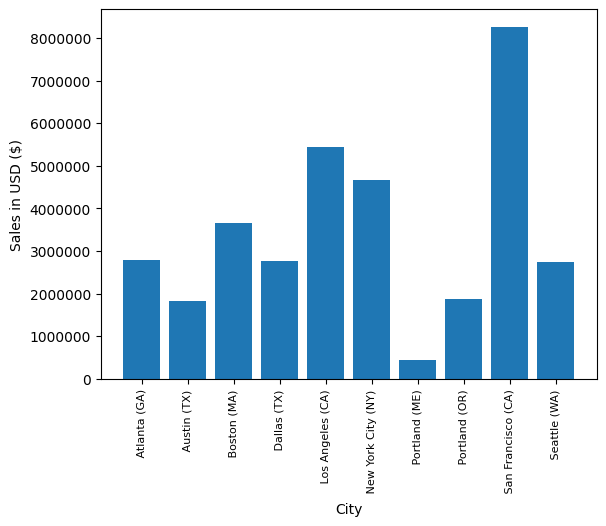

In [67]:
cities = [city for city, df in all_data.groupby('City')]

plt.ticklabel_format(style='plain') 
plt.bar(cities, result['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show()

### Question 3: What time should we display advertisements to maximise purchases?

##### The calculation actually took about 7 seconds to run too.

In [68]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,City,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,4,Dallas (TX),"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,4,Boston (MA),"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,4,Los Angeles (CA),"333 8th St, Los Angeles, CA 90001"


In [71]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,City,Purchase Address,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,4,Dallas (TX),"917 1st St, Dallas, TX 75001",8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,4,Boston (MA),"682 Chestnut St, Boston, MA 02215",22,30
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001",14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001",14,38
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,4,Los Angeles (CA),"333 8th St, Los Angeles, CA 90001",9,27


In [79]:
hours = [hour for hour, df in all_data.groupby('Hour')]
all_data.groupby(['Hour']).count().head(24)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,City,Purchase Address,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


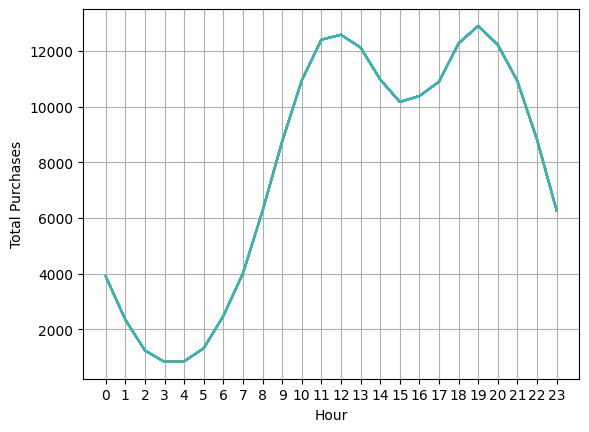

In [80]:
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.ylabel('Total Purchases')
plt.xlabel('Hour')
plt.xticks(hours)
plt.grid()
plt.show()

##### Hours that are most busy are 12PM and 7PM. Displaying ads an hour before this time up until these peak purchase hours might be wise. 

### Question 4: What products are most often sold together?

In [84]:
pair_purchase = all_data[all_data['Order ID'].duplicated(keep=False)]
pair_purchase['Bundled'] = pair_purchase.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
pair_purchase = pair_purchase[['Order ID', 'Grouped']].drop_duplicates()
pair_purchase.head()

/tmp/ipykernel_5325/2614292136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pair_purchase['Bundled'] = pair_purchase.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,City,Purchase Address,Hour,Minute,Bundled
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001",14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001",14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,4,Los Angeles (CA),"20 Hill St, Los Angeles, CA 90001",19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,4,Los Angeles (CA),"20 Hill St, Los Angeles, CA 90001",19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,4,Boston (MA),"823 Highland St, Boston, MA 02215",11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
